## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Import Datasets

In [2]:
df = pd.read_csv('dataset/train.tsv', delimiter='\t')
df.head()

,ID,REVIEW,LABEL
0,0,"The waiter is not friendly, the person wears n...",1
1,1,"kakaknya enak bangetttt, pelayanannya cepet ta...",5
2,2,"Pelayanan sangatt ramah, banyak promoanyaa",5
3,3,Tempatnya nyaman dan bersih,5
4,4,"Pelayanan cepat dan bagus, coba Durian Coffee ...",5


## Exploratory Data Analysis (EDA)

### Data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      902 non-null    int64 
 1   REVIEW  902 non-null    object
 2   LABEL   902 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 21.3+ KB


The dataset used consists of 902 entries.

### Missing data

In [4]:
df.isnull().sum().sort_values(ascending=False)

ID        0
REVIEW    0
LABEL     0
dtype: int64

There is no null data.

### More data insights

In [5]:
number = df['LABEL'].value_counts().sort_values(ascending=False)
percent = df['LABEL'].value_counts().sort_values(ascending=False) / len(df) * 100

dataRating = pd.concat([number, percent], axis=1, keys=['Number of Rating','Percent'])
dataRating

,Number of Rating,Percent
LABEL,,
5,557,61.751663
1,157,17.405765
4,101,11.197339
3,46,5.099778
2,41,4.545455


Insights:
1. Most of the reviews are positive. 557 reviews (61.75 %) are 5 stars.
2. There are 198 reviews (about 22 %) of reviewws are under 3 stars.

In [6]:
df['LENGTH'] = df['REVIEW'].apply(len)
df.head()

,ID,REVIEW,LABEL,LENGTH
0,0,"The waiter is not friendly, the person wears n...",1,64
1,1,"kakaknya enak bangetttt, pelayanannya cepet ta...",5,81
2,2,"Pelayanan sangatt ramah, banyak promoanyaa",5,42
3,3,Tempatnya nyaman dan bersih,5,27
4,4,"Pelayanan cepat dan bagus, coba Durian Coffee ...",5,66


In [7]:
df[df['LENGTH'] == df['LENGTH'].max()]

,ID,REVIEW,LABEL,LENGTH
497,497,"mau mereview tentang tukang parkir nya, sebene...",3,1222


In [8]:
df[df['LENGTH'] == df['LENGTH'].min()]

,ID,REVIEW,LABEL,LENGTH
70,70,Too much,4,8
92,92,Santaiii,5,8
199,199,Lumayan.,5,8
717,717,Jos lahh,5,8
806,806,The best,5,8


Insights:
1. The longest review sentences is 1222 characters long, which is very very long for a normal review.
2. The review is quite clean, there is no user bringing just punctuation (, or .) on a review sentence

## Text Cleaning

This text cleaning process includes:
- Upper case handling (so there is no difference in capital letters)
- look for root words in the Indonesian vocabulary (for example, 'membanggakan' == 'bannga' and 'kebanggan' == 'bangga')

In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import string

In [10]:
# Define the text processing funtion
def text_process(mess):
    # Handling lower/upper case
    nopunc = mess.lower()
    
    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed = stemmer.stem(nopunc)
    
    # Removing Stop Words
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    output = stopword.remove(stemmed)
    
    # Additional processing to remove specific words
    words_to_remove = ['ga', 'yang', 'yg', 'nya']
    output = ' '.join([word for word in output.split() if word not in words_to_remove])
    
    # Returns the cleaned text
    return output

In [11]:
# Applying the function to the review text
df['PREPROCESS'] = df['REVIEW'].apply(text_process)
df.head()

,ID,REVIEW,LABEL,LENGTH,PREPROCESS
0,0,"The waiter is not friendly, the person wears n...",1,64,the waiter is not friendly the person wears ni...
1,1,"kakaknya enak bangetttt, pelayanannya cepet ta...",5,81,kakak enak bangetttt layan cepet tanggap perta...
2,2,"Pelayanan sangatt ramah, banyak promoanyaa",5,42,layan sangatt ramah banyak promoanyaa
3,3,Tempatnya nyaman dan bersih,5,27,tempat nyaman bersih
4,4,"Pelayanan cepat dan bagus, coba Durian Coffee ...",5,66,layan cepat bagus coba durian coffee baru mantapp


In [15]:
df['LENGTH_PRE'] = df['PREPROCESS'].apply(len)
df.head()

,ID,REVIEW,LABEL,LENGTH,PREPROCESS,LENGTH_PRE
0,0,"The waiter is not friendly, the person wears n...",1,64,the waiter is not friendly the person wears ni...,63
1,1,"kakaknya enak bangetttt, pelayanannya cepet ta...",5,81,kakak enak bangetttt layan cepet tanggap perta...,61
2,2,"Pelayanan sangatt ramah, banyak promoanyaa",5,42,layan sangatt ramah banyak promoanyaa,37
3,3,Tempatnya nyaman dan bersih,5,27,tempat nyaman bersih,20
4,4,"Pelayanan cepat dan bagus, coba Durian Coffee ...",5,66,layan cepat bagus coba durian coffee baru mantapp,49


In [17]:
df[df['LENGTH_PRE'] == df['LENGTH_PRE'].min()]

,ID,REVIEW,LABEL,LENGTH,PREPROCESS,LENGTH_PRE
199,199,Lumayan.,5,8,lumayan,7
748,748,Lumayanlah,4,10,lumayan,7


In [18]:
df = df.replace('', np.NaN)
df.isnull().sum()

ID            0
REVIEW        0
LABEL         0
LENGTH        0
PREPROCESS    0
LENGTH_PRE    0
dtype: int64

No null data even after the review data is preprocessed

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: >]], dtype=object)

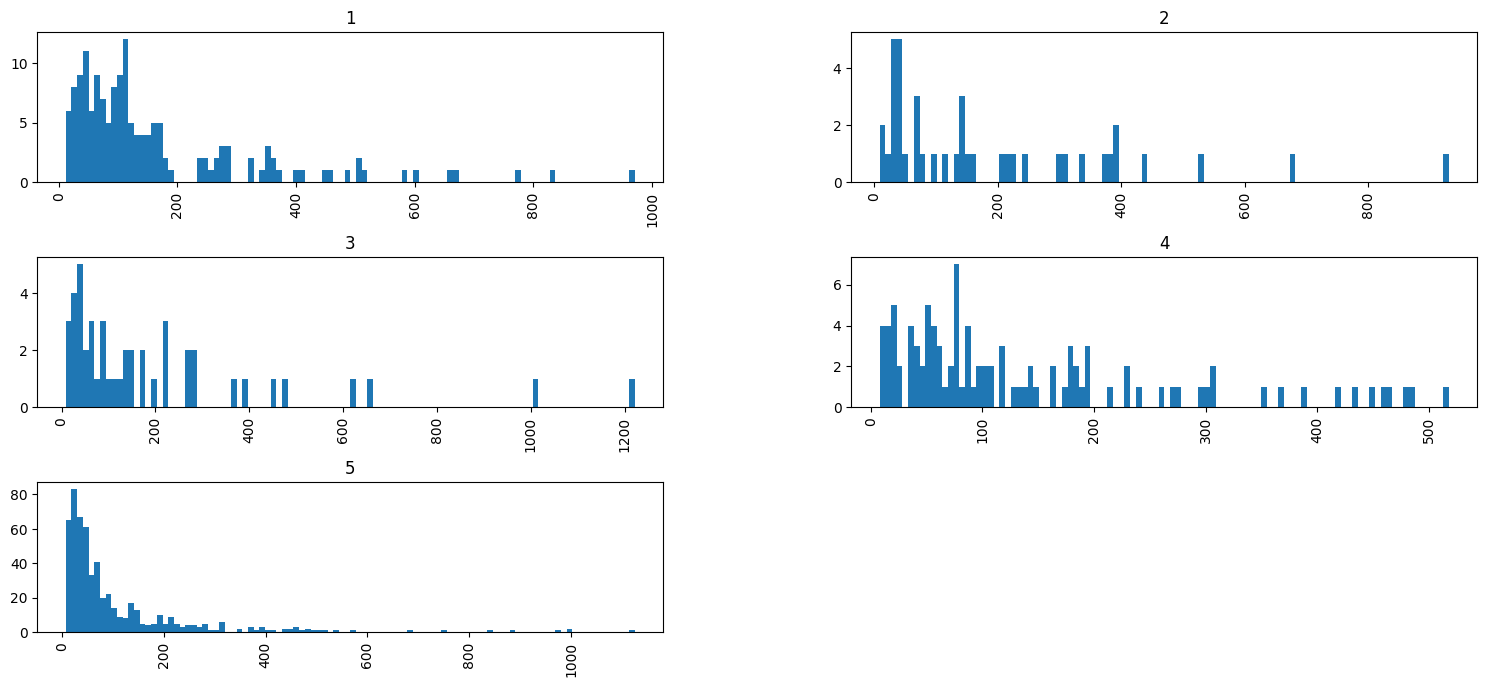

In [19]:
df.hist(column='LENGTH', by='LABEL', bins=100, figsize=(18,8))

There is no meaningful correlation between review data length and label.

In [20]:
import nltk
from nltk.corpus import stopwords
import string
import warnings
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
stopword = STOPWORDS

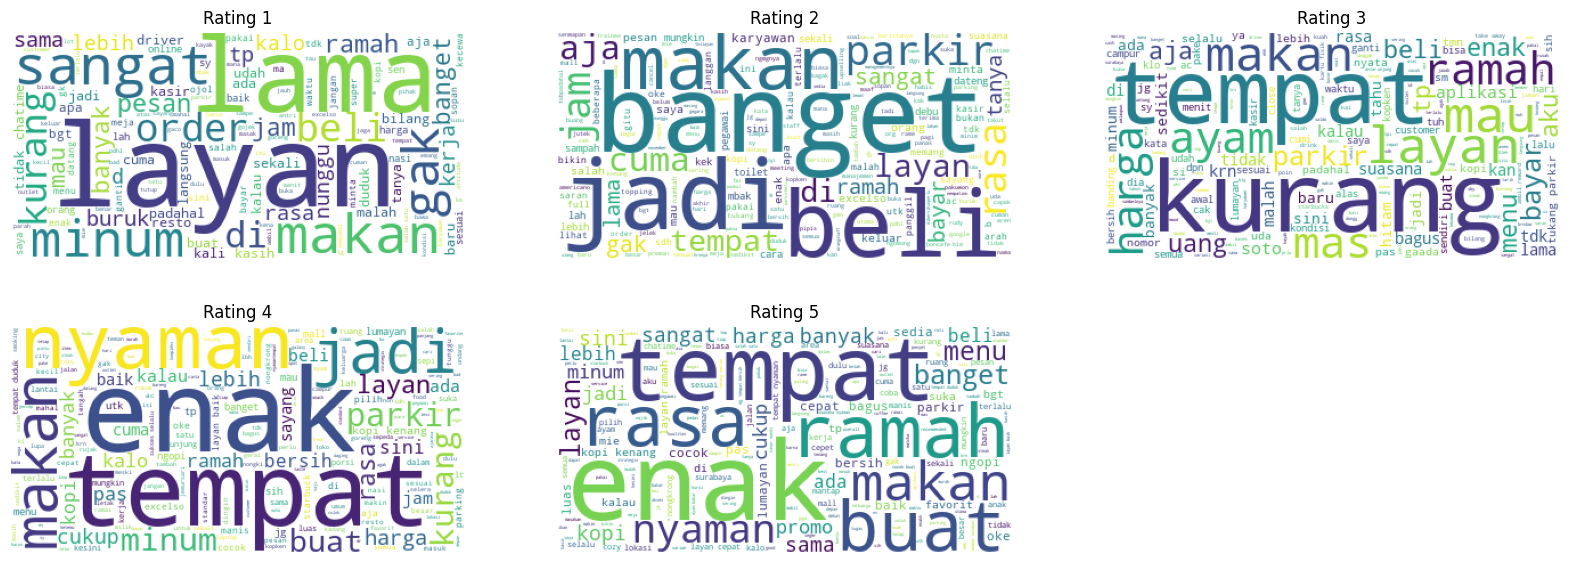

In [21]:
def wordclouds(a,b):
    all_data = ''.join(a['PREPROCESS'])
    wordcloud = WordCloud(stopwords = stopword, background_color="white").generate(all_data)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(b)
    
plt.figure(figsize=(20,7))
plt.subplot(231)
one = df[df['LABEL'] == 1]
wordclouds(one,'Rating 1')

plt.subplot(232)
two = df[df['LABEL'] == 2]
wordclouds(two,'Rating 2')

plt.subplot(233)
three = df[df['LABEL'] == 3]
wordclouds(three,'Rating 3')

plt.subplot(234)
four = df[df['LABEL'] == 4]
wordclouds(four,'Rating 4')

plt.subplot(235)
five = df[df['LABEL'] == 5]
wordclouds(five,'Rating 5')

Common words found based on rating :
- Rating 1: layan, lama, beli, sangat, gak, order
- Rating 2: banget, jadi, beli, makan, jam, lama
- Rating 3: kurang, tempat, layan, mau
- Rating 4: jadi, enak, tempat, makan, nyaman, harga
- Rating 5: enak, tempat, makan, buat, ramah, nyaman

## Data Splitting

In [22]:
from sklearn.model_selection import train_test_split

X = df['PREPROCESS']
Y = df['LABEL']
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state=42, test_size=.2)

In [23]:
x_train

10                                promonya banyak banget
375    makan oke layan sang kasir trainee sangat oke ...
247    datang kesini jam10 pagi tunggu anak main play...
388    salah satu tuju kalau mau makan steak affordab...
433    - cara tempat susah cari pojok banget - pegawa...
                             ...                        
106              mie emang top utama bakso sangat lembut
270                        staff laki ramah bad attitude
860    soto ayam lamongan kuah asa gurih daging ayam ...
435    kemarin excelso tp 6 belah nona manis lumayan ...
102    baru jam 18 00 buka puasa nasi habis sedikit k...
Name: PREPROCESS, Length: 721, dtype: object

In [24]:
y_train.value_counts()

LABEL
5    441
1    126
4     78
3     41
2     35
Name: count, dtype: int64

In [25]:
x_val

70                                              too much
235                                      tempat dan luas
430    makan oke segi layan oke spgnya ramah sopan po...
412    pegawai sombong attitude rasa kopi encer enak ...
39                                     cari angin tipis2
                             ...                        
862                                       layan sgt baik
440    depot bu rudy pasar atum letak foodcourt atum ...
781    order gofood gak barang mainin driver kerja ru...
25               tempat cocok buat relaksasi pikir ngopi
84     pernah bosen sama 2 menu cheskee fruit tea sou...
Name: PREPROCESS, Length: 181, dtype: object

In [26]:
y_val.value_counts()

LABEL
5    116
1     31
4     23
2      6
3      5
Name: count, dtype: int64

## Data Modeling
Before the data is entered into the model, the text data must first be converted into numeric using the word weighting method (Count Vectorizer, TFIDF). To make coding efficient, we will use a pipeline.

because this dataset is a Supervised Learning dataset, it means you can use Regression or Classification

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [28]:
def evaluation(x,y):
    print(classification_report(x, y, zero_division=1))
    cm = confusion_matrix(x, y)
    sb.heatmap(pd.DataFrame(cm),annot=True, cmap="BuPu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### Pipelines

In [29]:
pipeline_Random = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
])

pipeline_Logistic = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', LogisticRegression()),
])

pipeline_SVC2 = Pipeline([
    ('cv', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', SVC()),
])

In [30]:
pipeline_Random.fit(x_train, y_train)
pipeline_Logistic.fit(x_train, y_train)
pipeline_SVC2.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

## Evaluation Matrix

### Random Forest

              precision    recall  f1-score   support

           1       0.52      0.76      0.62        21
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.97      0.71      0.82       157

    accuracy                           0.71       181
   macro avg       0.30      0.70      0.29       181
weighted avg       0.90      0.71      0.78       181



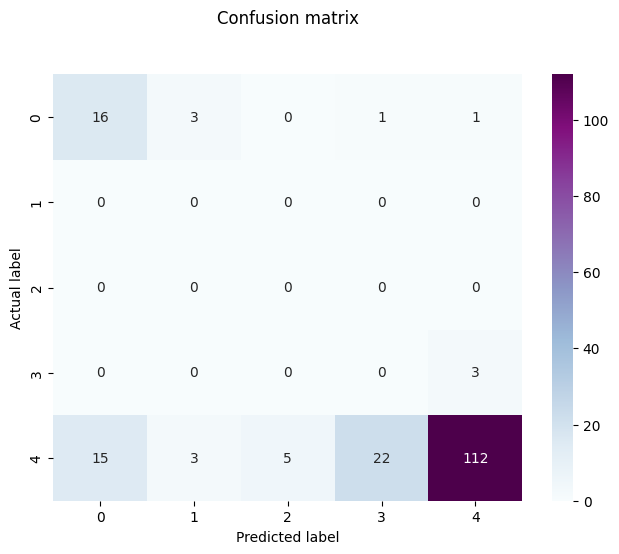

In [31]:
y_pred_rf = pipeline_Random.predict(x_val)
evaluation(y_pred_rf, y_val)

### Logictic Regression

              precision    recall  f1-score   support

           1       0.48      0.75      0.59        20
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.99      0.71      0.83       161

    accuracy                           0.72       181
   macro avg       0.30      0.89      0.28       181
weighted avg       0.94      0.72      0.80       181



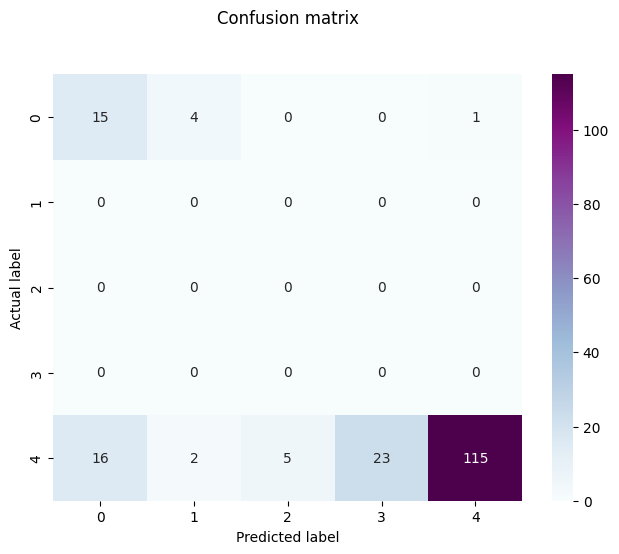

In [32]:
y_pred_lr = pipeline_Logistic.predict(x_val)
evaluation(y_pred_lr, y_val)

### Support Vector Classification (SVC)

              precision    recall  f1-score   support

           1       0.35      0.79      0.49        14
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       1.00      0.69      0.82       167

    accuracy                           0.70       181
   macro avg       0.27      0.90      0.26       181
weighted avg       0.95      0.70      0.79       181



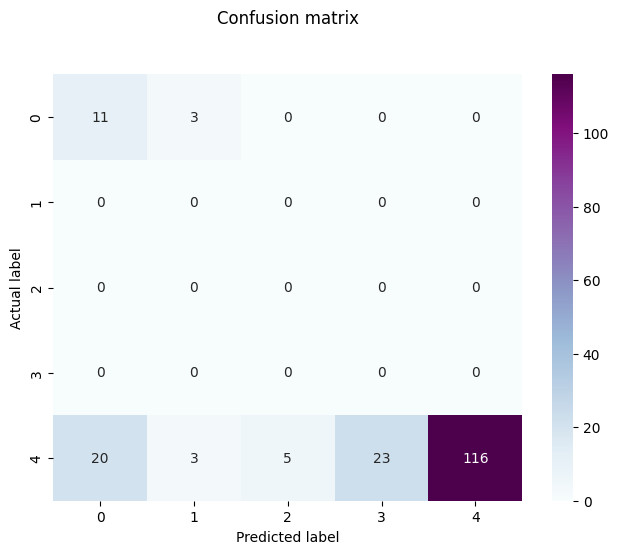

In [33]:
y_pred_svc = pipeline_SVC2.predict(x_val)
evaluation(y_pred_svc, y_val)

Looking at the three models above, the average accuracy is almost the same as SVC (70 %), Random Forest (71 %), Logistic regression (72 %), but for all three the recall value for rating 2 = 0.0

## Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Random Forest

In [35]:
# Number of trees in random forest
n_estimators = np.arange(100, 400, 100)
# Maximum number of levels in tree
max_depth = [10, 20, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf' : min_samples_leaf,
              }
BestParamsforest= RandomizedSearchCV(pipeline_Random, random_grid, cv=5, n_jobs=-1, verbose=1)
BestParamsforest.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('bow', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [10, 20, 30],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': array([100, 200, 300])},
                   verbose=1)

              precision    recall  f1-score   support

           1       0.32      0.83      0.47        12
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.99      0.68      0.81       169

    accuracy                           0.69       181
   macro avg       0.26      0.90      0.25       181
weighted avg       0.95      0.69      0.78       181



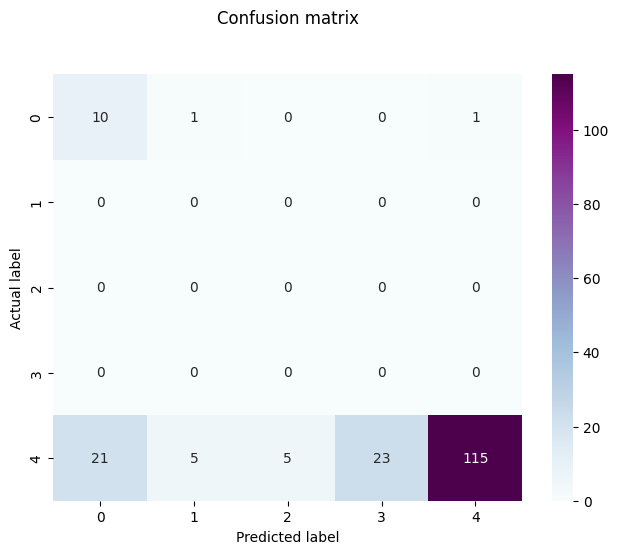

In [36]:
y_pred_rf_max = BestParamsforest.predict(x_val)
evaluation(y_pred_rf_max, y_val)

### Support Vector Classification (SVC)

In [37]:
random_grid = {'classifier__C': [0.1, 1, 10, 100, 1000],
               'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
BestParamsSVC = RandomizedSearchCV(pipeline_SVC2, random_grid, cv=5, n_jobs= -1, verbose=1)
BestParamsSVC.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('classifier', SVC())]),
                   n_jobs=-1,
                   param_distributions={'classifier__C': [0.1, 1, 10, 100,
                                                          1000],
                                        'classifier__gamma': [1, 0.1, 0.01,
                                                              0.001, 0.0001],
                                        'classifier__kernel': ['linear', 'poly',
                                                               'rbf',
                                                               'sigmoid']},
                   verbose=1)

              precision    recall  f1-score   support

           1       0.68      0.75      0.71        28
           2       0.00      1.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      1.00      0.00         0
           5       0.99      0.76      0.86       152

    accuracy                           0.75       181
   macro avg       0.33      0.70      0.31       181
weighted avg       0.94      0.75      0.83       181



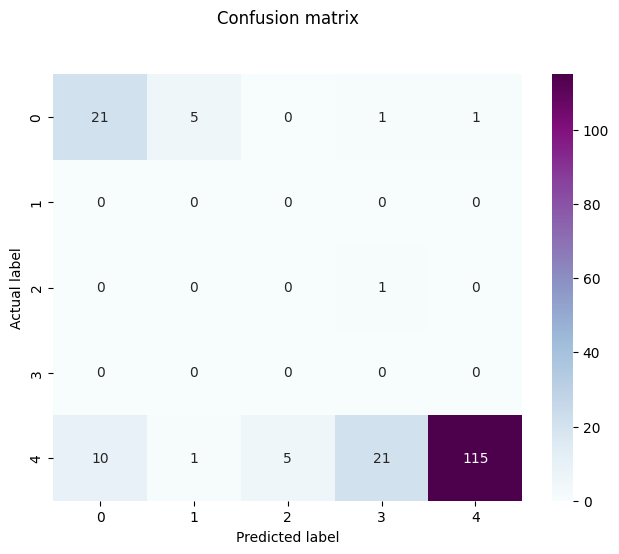

In [48]:
y_pred_svc_max = BestParamsSVC.predict(x_val)
evaluation(y_pred_svc_max, y_val)

## Final Processing

In [39]:
df_test = pd.read_csv('dataset/test.tsv', delimiter='\t')
df_test.head()

,ID,REVIEW
0,0,"LOCATION: Letaknya di perempatan jalan, di dep..."
1,1,"Boleh lah sesekali kesini, makanan biasa saja ..."
2,2,Tempatnya enak biarpun tidak luas. Suasana nyaman
3,3,"depot bu Rudy antri, driver gojek kalau dapet ..."
4,4,saya sering banget makan di tempat ini ...tapi...


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      500 non-null    int64 
 1   REVIEW  500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [41]:
df_test.isnull().sum().sort_values(ascending=False)

ID        0
REVIEW    0
dtype: int64

In [42]:
df_test['LENGTH'] = df_test['REVIEW'].apply(len)
df_test.head()

,ID,REVIEW,LENGTH
0,0,"LOCATION: Letaknya di perempatan jalan, di dep...",752
1,1,"Boleh lah sesekali kesini, makanan biasa saja ...",174
2,2,Tempatnya enak biarpun tidak luas. Suasana nyaman,49
3,3,"depot bu Rudy antri, driver gojek kalau dapet ...",114
4,4,saya sering banget makan di tempat ini ...tapi...,122


In [43]:
df_test[df_test['LENGTH'] == df_test['LENGTH'].max()]

,ID,REVIEW,LENGTH
444,444,TERUNTUK PEGAWAI CLEANING SERVICE LAKI LAKI BE...,1995


In [44]:
df_test[df_test['LENGTH'] == df_test['LENGTH'].min()]

,ID,REVIEW,LENGTH
387,387,The best,8


In [45]:
# Applying the function to the review text
df_test['PREPROCESS'] = df_test['REVIEW'].apply(text_process)
df_test.head()

,ID,REVIEW,LENGTH,PREPROCESS
0,0,"LOCATION: Letaknya di perempatan jalan, di dep...",752,location letak empat jalan depan gereja lama g...
1,1,"Boleh lah sesekali kesini, makanan biasa saja ...",174,lah sekal kesini makan biasa bilang enak cukup...
2,2,Tempatnya enak biarpun tidak luas. Suasana nyaman,49,tempat enak biarpun luas suasana nyaman
3,3,"depot bu Rudy antri, driver gojek kalau dapet ...",114,depot bu rudy antri driver gojek kalau dapet o...
4,4,saya sering banget makan di tempat ini ...tapi...,122,sering banget makan tempat tapi lama lama samb...


In [59]:
df_test['LABEL'] = pipeline_Logistic.predict(df_test['PREPROCESS'])
df_test.head()

,ID,REVIEW,LENGTH,PREPROCESS,LABEL
0,0,"LOCATION: Letaknya di perempatan jalan, di dep...",752,location letak empat jalan depan gereja lama g...,5
1,1,"Boleh lah sesekali kesini, makanan biasa saja ...",174,lah sekal kesini makan biasa bilang enak cukup...,5
2,2,Tempatnya enak biarpun tidak luas. Suasana nyaman,49,tempat enak biarpun luas suasana nyaman,5
3,3,"depot bu Rudy antri, driver gojek kalau dapet ...",114,depot bu rudy antri driver gojek kalau dapet o...,1
4,4,saya sering banget makan di tempat ini ...tapi...,122,sering banget makan tempat tapi lama lama samb...,1


In [60]:
# Create result dataframe
result_df = pd.DataFrame({'ID': df_test['ID'], 'LABEL': df_test['LABEL']})

# Menyimpan dataframe dalam csv
result_df.to_csv('result/final-lr.csv', index=False)